In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import cifar10

In [2]:
(X_train, y_train),(X_test, y_test) = cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1)
y_test

array([3, 8, 8, ..., 5, 1, 7])

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

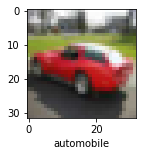

In [10]:
plot_sample(X_train, y_train, 255)

In [11]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [12]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [13]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
50000/50000 [==============================] - 50s 993us/sample - loss: 1.4245 - acc: 0.4888
Epoch 2/10
50000/50000 [==============================] - 57s 1ms/sample - loss: 1.0769 - acc: 0.6226
Epoch 3/10
50000/50000 [==============================] - 57s 1ms/sample - loss: 0.9417 - acc: 0.6717
Epoch 4/10
50000/50000 [==============================] - 56s 1ms/sample - loss: 0.8567 - acc: 0.7020
Epoch 5/10
50000/50000 [==============================] - 57s 1ms/sample - loss: 0.7860 - acc: 0.7259
Epoch 6/10
50000/50000 [==============================] - 56s 1ms/sample - loss: 0.7241 - acc: 0.7480
Epoch 7/10
50000/50000 [==============================] - 57s 1ms/sample - loss: 0.6692 - acc: 0.7670
Epoch 8/10
50000/50000 [==============================] - 57s 1ms/sample - loss: 0.6239 - acc: 0.7812
Epoch 9/10
50000/50000 [==============================] - 57s 1ms/sample - loss: 0.5828 - acc: 0.7942
Epoch 10/10
50000/50000 [==============================] - 57s 1ms/sample - loss

In [15]:
cnn.evaluate(X_test,y_test)

10000/10000 [==============================] - 4s 393us/sample - loss: 0.9366 - acc: 0.7004


[0.9366259580612183, 0.7004]

In [16]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[2.70366087e-03, 5.74355386e-03, 6.90372661e-03, 6.91373885e-01,
        4.31223353e-03, 2.37618357e-01, 3.95221217e-03, 1.46762957e-03,
        3.35044637e-02, 1.24202743e-02],
       [2.65706127e-04, 1.75789949e-02, 1.43810186e-10, 1.59989777e-09,
        5.68796621e-10, 4.56669251e-12, 3.98994761e-11, 4.55702576e-12,
        9.82094228e-01, 6.11178257e-05],
       [2.72771865e-02, 2.44742095e-01, 6.22820153e-05, 3.53899901e-03,
        8.16152839e-04, 9.61759768e-04, 2.44292489e-04, 4.24831378e-04,
        7.03530192e-01, 1.84021834e-02],
       [8.27663243e-01, 2.80860532e-03, 2.39898730e-02, 2.98305007e-04,
        5.05056232e-03, 1.18086382e-06, 3.65784217e-05, 2.60262441e-05,
        1.40015319e-01, 1.10271925e-04],
       [1.25326904e-08, 1.36386495e-06, 4.93286038e-03, 7.86163658e-03,
        8.71035099e-01, 1.11713904e-04, 1.15983769e-01, 7.26826693e-05,
        6.42812324e-07, 2.06647570e-07]], dtype=float32)

In [17]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [18]:
y_test[:5]

array([3, 8, 8, 0, 6])

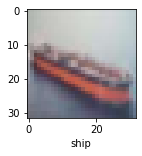

In [19]:
plot_sample(X_test, y_test,999)